In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from src.visualization import (histogram, boxplot, scatterplot, hist_per_district, scatter_per_district,
                               ordered_barchart, correlation_plot, create_hue)

%load_ext autoreload
%autoreload 2
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
#sns.set_context('poster')

path_processed = '/home/matteo@COPPET/Documents/data_science/projects/housing_prices_firenze/data/processed/'

# Exploratory data analysis

## 1. Loading data

In [2]:
df = pd.read_csv(path_processed+'data_clean.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7070 entries, 0 to 7069
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Superficie                   7070 non-null   float64
 1   Piano                        6996 non-null   object 
 2   Zona                         7070 non-null   object 
 3   Prezzo                       7070 non-null   float64
 4   Stato                        6888 non-null   object 
 5   Climatizzazione              7070 non-null   object 
 6   Prezzo_per_m2                7070 non-null   float64
 7   Classe_immobile              6113 non-null   object 
 8   Tipo_proprietà               6723 non-null   object 
 9   Tipologia_casa               7070 non-null   object 
 10  Anno_costruzione_bins        5221 non-null   object 
 11  Riscaldamento_A_C            7070 non-null   object 
 12  Tipo_riscaldamento           5561 non-null   object 
 13  Alimentazione_risc

In [3]:
df.describe()

,Superficie,Prezzo,Prezzo_per_m2,Posti_garage,Posti_esterni,Num_bagni,Num_tot_locali
count,"7,070.00","7,070.00","7,070.00","7,070.00","7,070.00","7,001.00","7,064.00"
mean,89.58,"355,261.90","4,062.72",0.08,0.23,1.52,3.72
std,37.97,"153,690.63",919.10,0.31,2.17,0.66,1.47
min,15.00,"55,000.00","2,504.35",0.00,0.00,1.00,0.00
25%,60.00,"245,000.00","3,352.27",0.00,0.00,1.00,3.00
50%,81.00,"320,000.00","3,971.01",0.00,0.00,1.00,4.00
75%,111.00,"430,000.00","4,625.64",0.00,0.00,2.00,5.00
max,211.00,"860,000.00","6,966.67",2.00,176.00,4.00,13.00


## 2. Continuous variables

In [4]:
continuous_vars = ['Prezzo', 'Superficie', 'Prezzo_per_m2']

### 2.1 Distributions

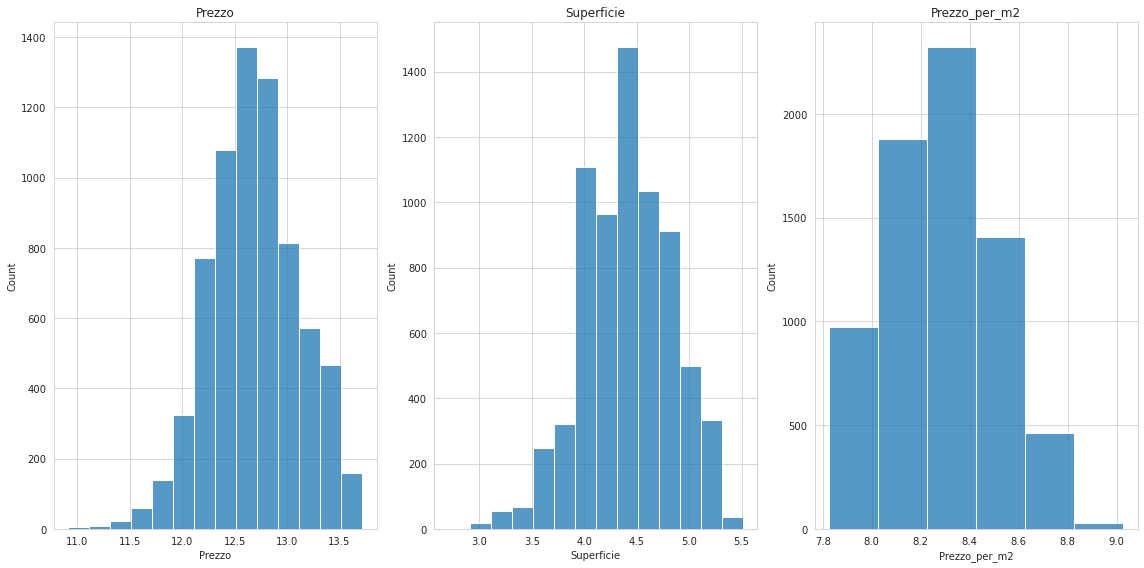

In [5]:
histograms = histogram(df, continuous_vars, log=True)
plt.show()

We can clearly see that the log values for the price and square meters follow a normal distribution. This would mean that these variables follow an exponential distribution.

### 2.2 Boxplots

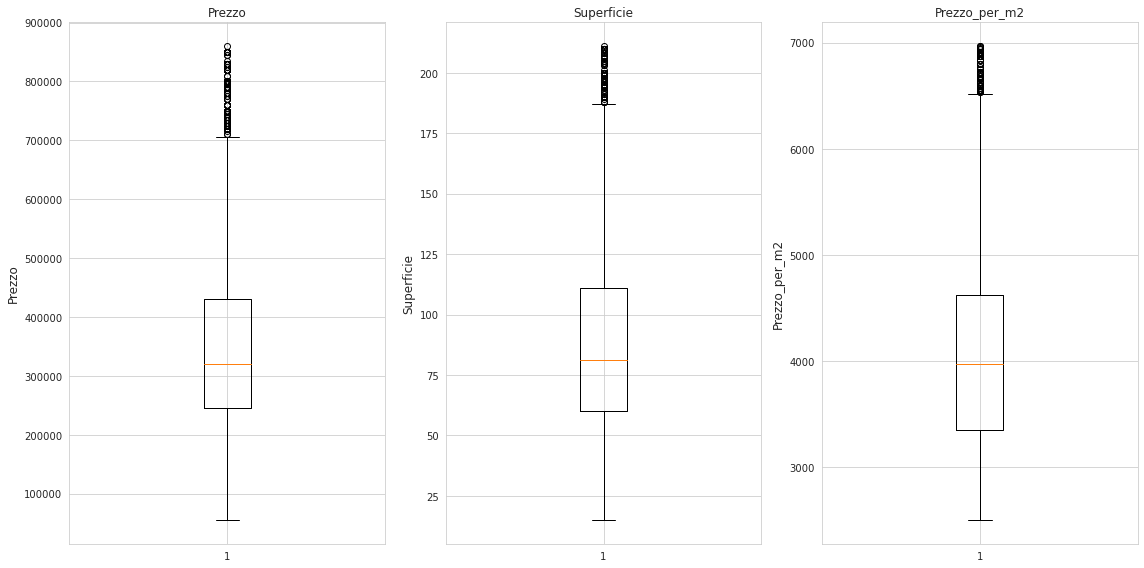

In [6]:
boxplots = boxplot(df, continuous_vars, log=False)
plt.show()

### 2.3 Price vs. square meters

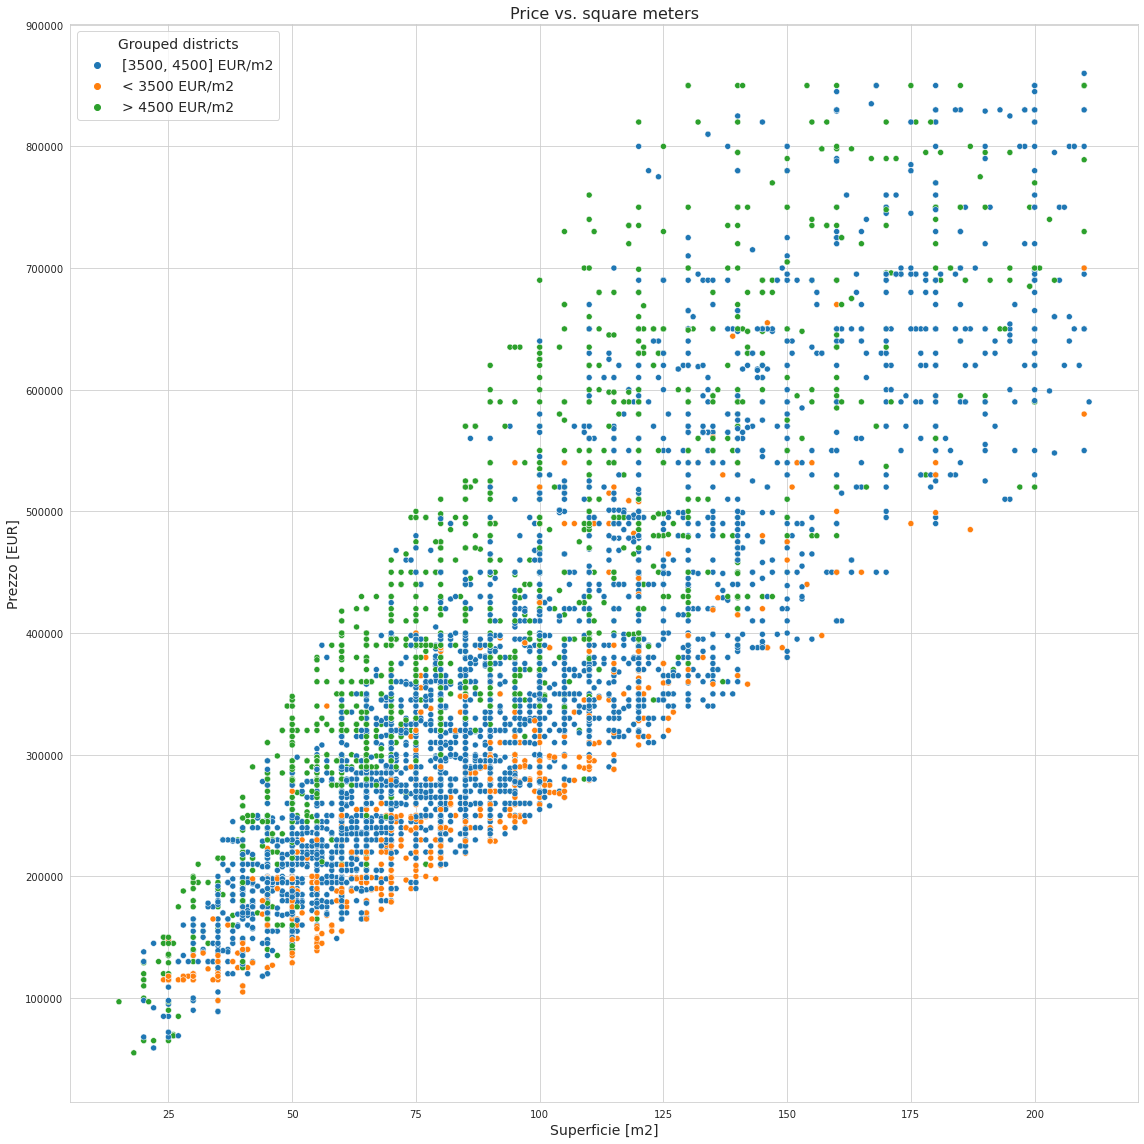

In [7]:
df = create_hue(df)

scatter = scatterplot(df, 'Superficie', 'Prezzo', hue_data=df['hue'], log=False)
plt.show()

Again, we've normalized the features here to reduce the effect of outliers on our graph. There is a clear linear relationship between the price and the area where greater area means higher price.

## 3. Discrete and categorical variables

### 3.1 Price and number of rooms

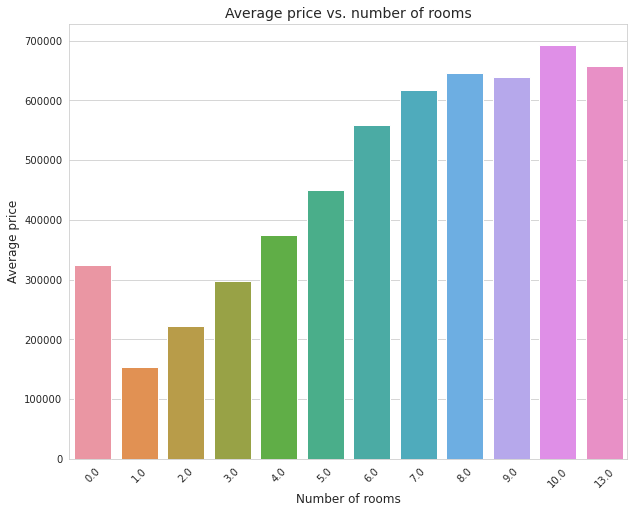

In [8]:
fig = plt.figure(figsize=(10, 8))
sns.set_style('whitegrid')
sns.barplot(y=df['Prezzo'], x=df['Num_tot_locali'], ci=False)
plt.xlabel("Number of rooms", size=12)
plt.ylabel("Average price", size=12)
plt.xticks(rotation=45)
plt.title('Average price vs. number of rooms', size=14)
plt.show()

There isn't much information on this graph but we know that the number of rooms is highly correlated to the square meters of the home.

### 3.2 Price and number of bathrooms

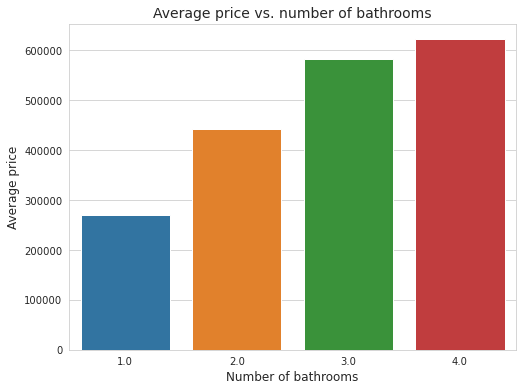

In [9]:
fig = plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
sns.barplot(y=df['Prezzo'], x=df['Num_bagni'], ci=False)
plt.xlabel("Number of bathrooms", size=12)
plt.ylabel("Average price", size=12)
plt.title('Average price vs. number of bathrooms', size=14)
plt.show()

### 3.3 Price and heating

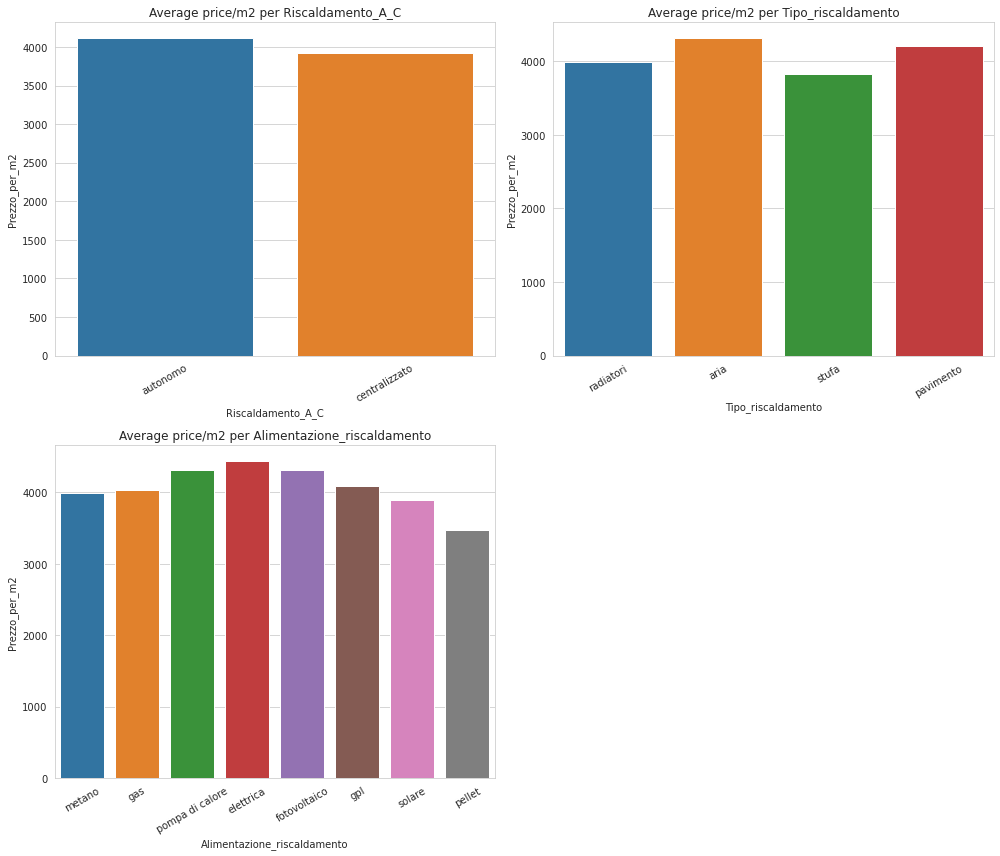

In [10]:
heating_cols = ['Riscaldamento_A_C', 'Tipo_riscaldamento', 'Alimentazione_riscaldamento']

fig = plt.figure(figsize=(14, 12))
sns.set_style('whitegrid')
for i, heating in enumerate(heating_cols, 1):
    
    x_values = df[heating]
    y_values = df['Prezzo_per_m2']

    plt.subplot(2, 2, i)
    sns.barplot(x=x_values, y=y_values, ci=None)
    plt.title('Average price/m2 per ' + str(heating))
    plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Heating does not seem to influence price that much.

### 3.4 Price and parking

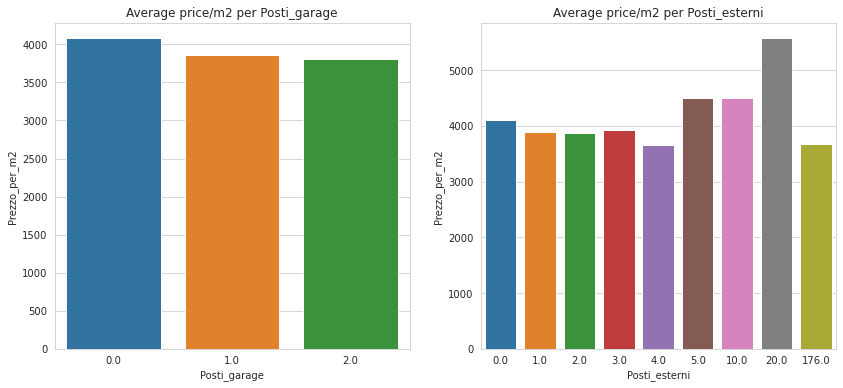

In [11]:
parking_cols = ['Posti_garage', 'Posti_esterni']

fig = plt.figure(figsize=(14, 6))
sns.set_style('whitegrid')
for i, parking in enumerate(parking_cols, 1):
    
    x_values = df[parking]
    y_values = df['Prezzo_per_m2']

    plt.subplot(1, 2, i)
    sns.barplot(x=x_values, y=y_values, ci=None)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    plt.title('Average price/m2 per ' + str(parking))

Again here there does not seem to be an apparent relationship between average price/m2 and parking.

### 3.5 Price and energy efficiency

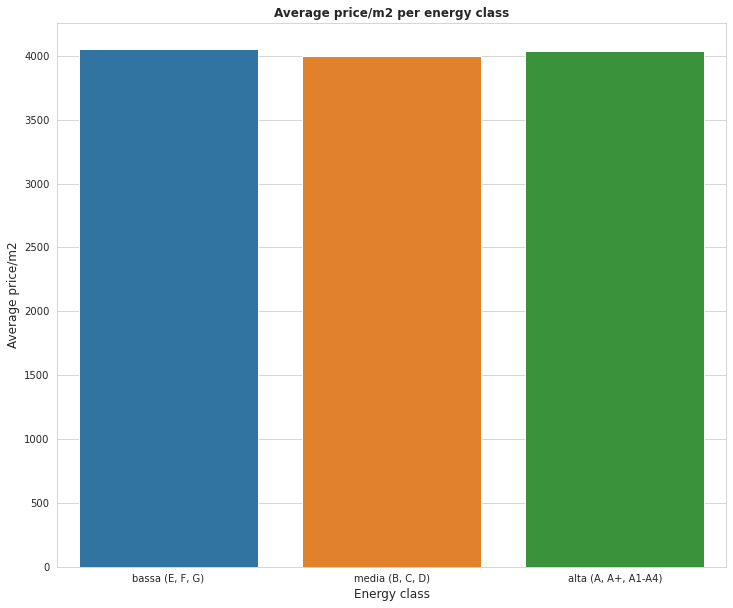

In [12]:
fig = plt.figure(figsize=(12, 10))
sns.barplot(x=df['Efficienza_energetica'], y=df['Prezzo_per_m2'], ci=None)
plt.xlabel("Energy class", size=12)
plt.ylabel("Average price/m2", size=12)
plt.title('Average price/m2 per energy class', weight='bold')
plt.show()

Not the results we were expecting. This might be because a lot of expensive homes in the city center are older buildings and therefore have poor energy efficiency.

## 4 Continuous and discrete variables

### 4.1 Price and district

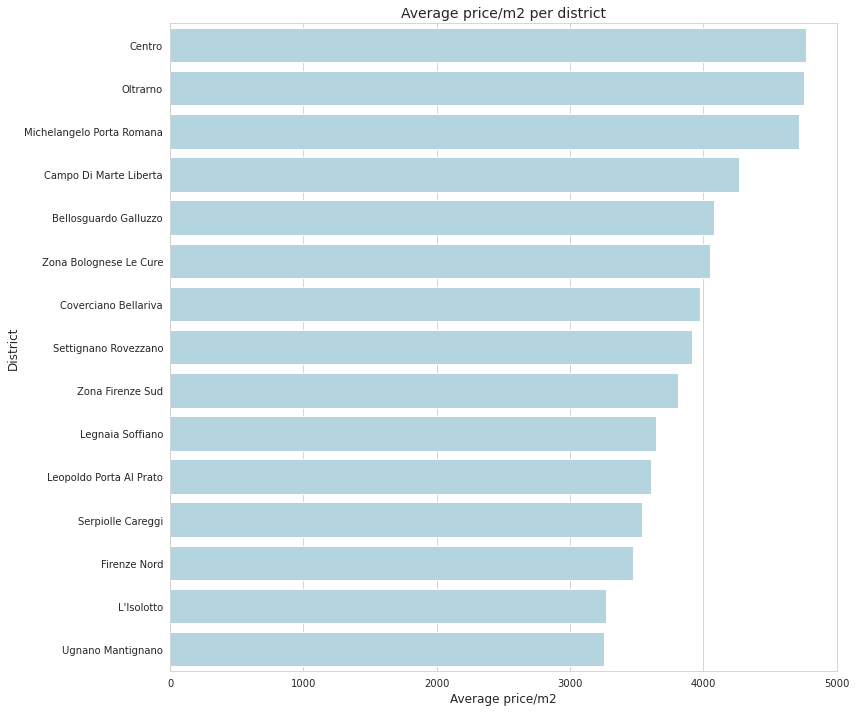

In [13]:
barchart = ordered_barchart(df)
plt.show()

Dividing the price by the square meters gives us a better idea of what districts in Firenze cost more because we can exclude one of the most influencial features on price (square meters). As expected, houses in the city historic center (oltrarno, centro and Michelangelo/Porta Romana) are the most expensive per square meter.

### 4.2 Distribution per district

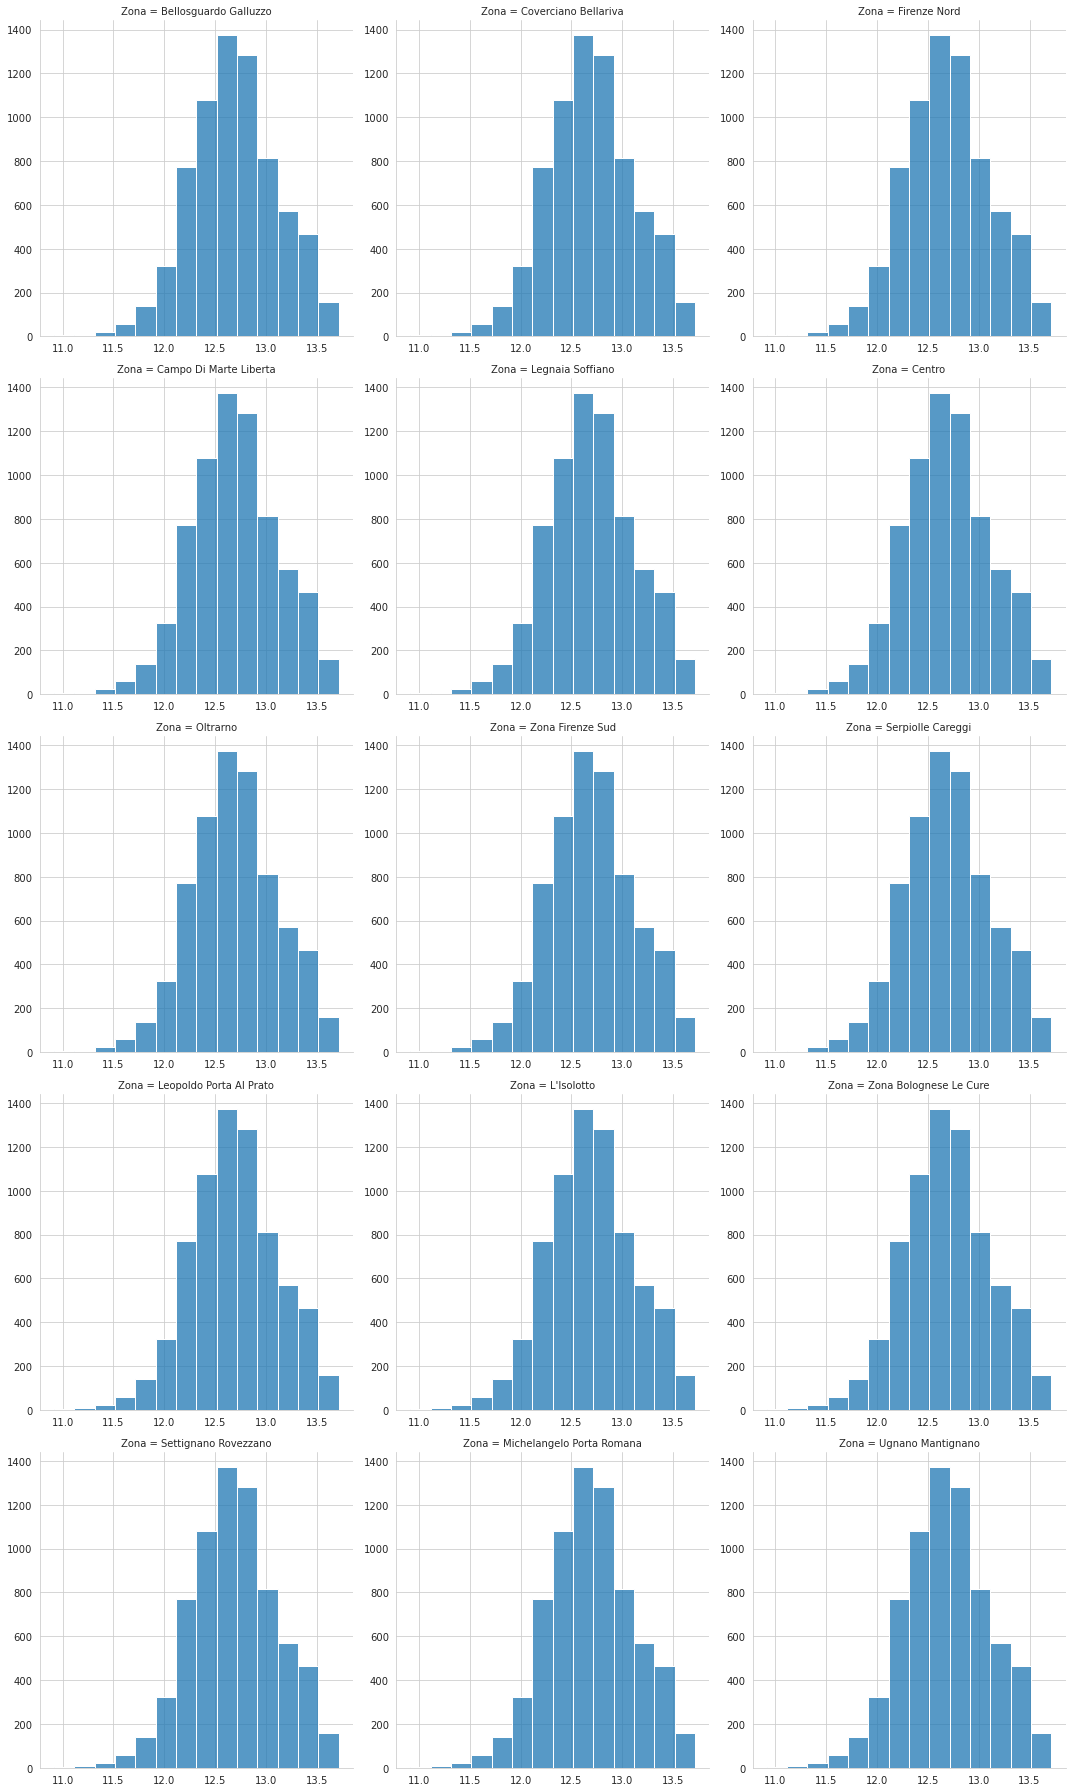

In [14]:
hists = hist_per_district(df, col='Zona', row=None, feature='Prezzo', log=True)
plt.show()

### 4.3 Scatterplot per district

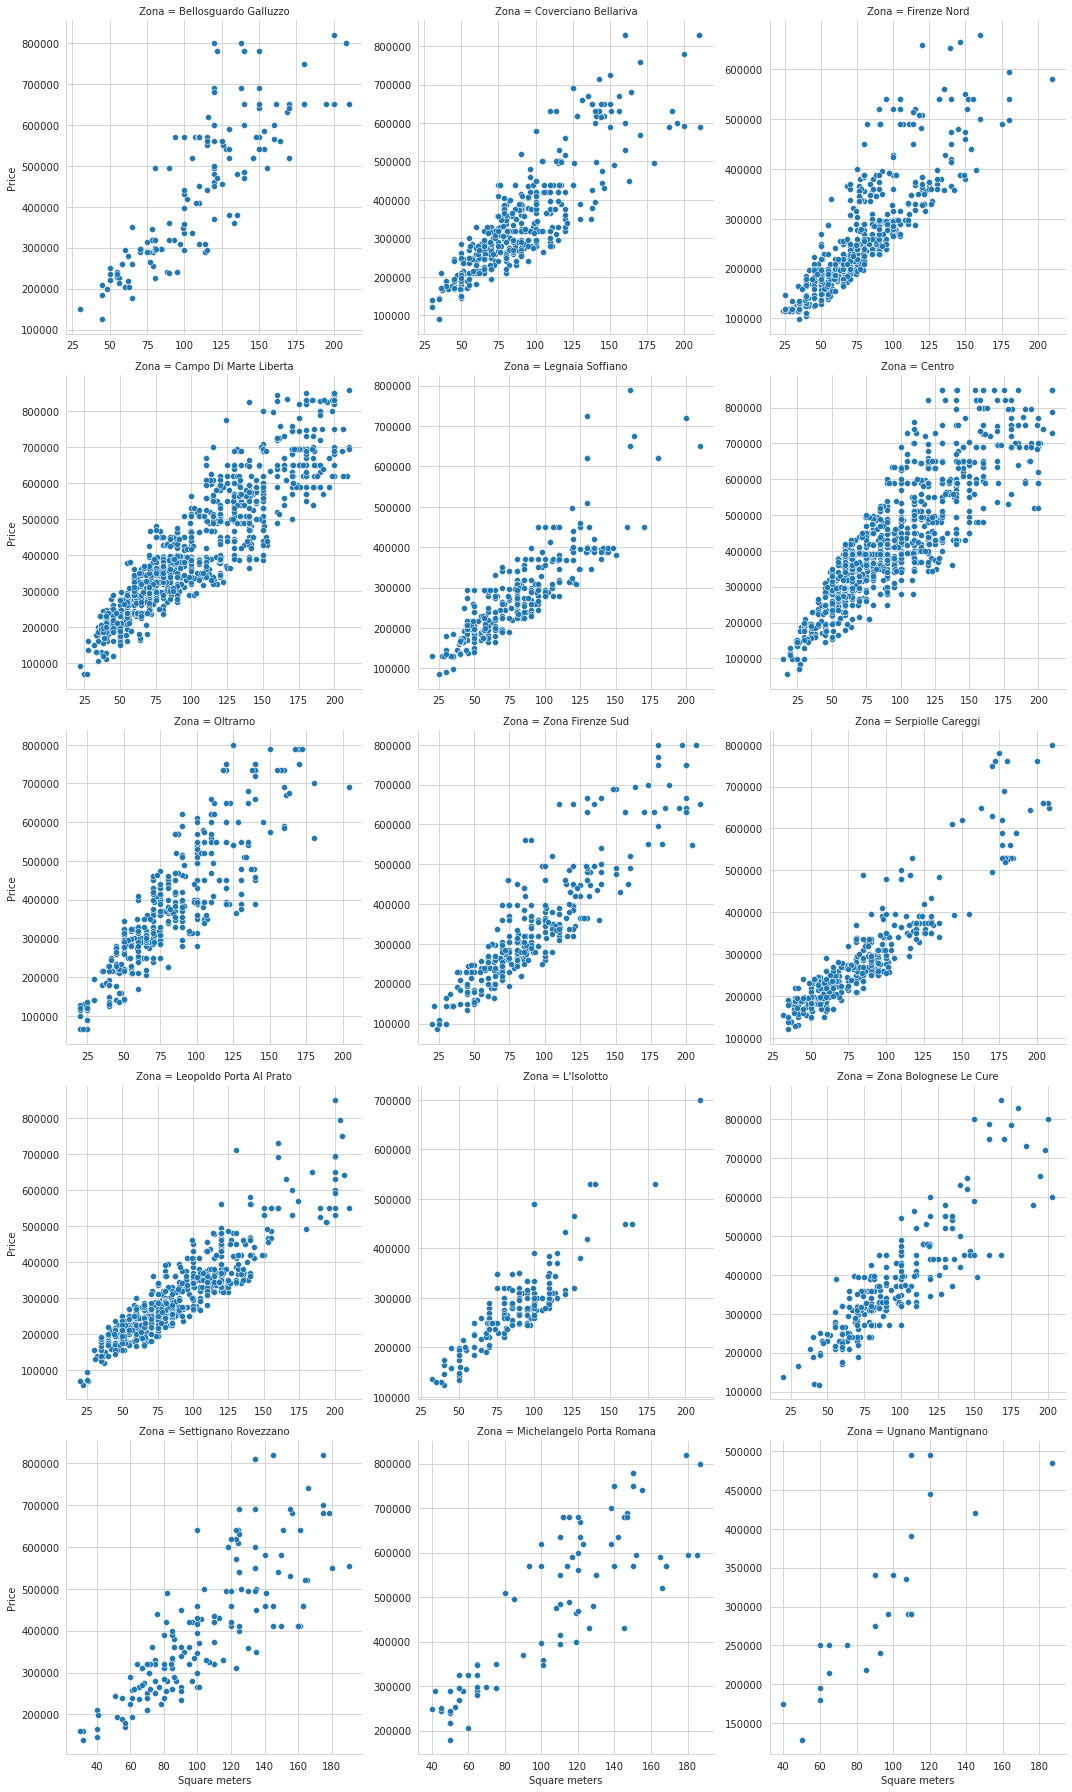

In [15]:
scatters = scatter_per_district(df, col='Zona', row=None, log=False)
plt.show()

#### Correlation plot

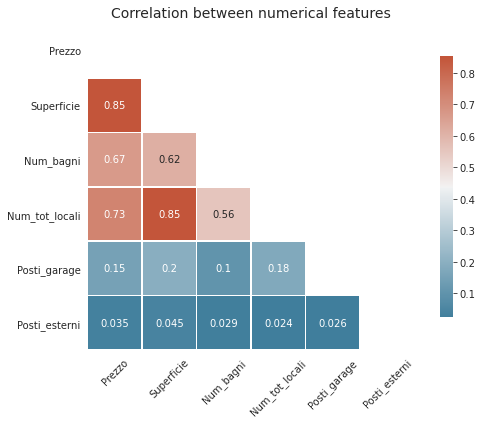

In [16]:
corr_cols = ['Prezzo', 'Superficie', 'Num_bagni', 'Num_tot_locali', 'Posti_garage', 'Posti_esterni']
corr_plot = correlation_plot(df, corr_cols)

Granted that the heatmap above only shows **linear** correlation, it is pretty clear that square meters and number of rooms/bathrooms correlate positively with price. The three features however are also correlated between each other which could cause problems when fitting a linear model to the data.